In [162]:

data1 = [(2, 96684422), (4, 96767781), (6, 96760818), (8, 96694682), (10, 96684321), (12, 96809939), (14, 96835986), (16, 96711760), (18, 96763567), (20, 96684234), (22, 96764812), (24, 92767258), (26, 92713812), (28, 92706904), (30, 92784080), (32, 92685222), (48, 92747737), (64, 92632542), (128, 64873490), (256, 38206225), (512, 21131384), (1024, 11531901)]
data2 = [(2, 96924621), (4, 96902885), (6, 96920432), (8, 96915508), (10, 96930133), (12, 96887130), (14, 96911436), (16, 96914584), (18, 96908412), (20, 96916924), (22, 96918826), (24, 92874049), (26, 92856896), (28, 92848555), (30, 92877822), (32, 92861008), (48, 92890540), (64, 92815612), (128, 62674406), (256, 37167646), (512, 21149861), (1024, 11076264)]
data3 = [(2, 96944167), (4, 96905636), (6, 96780996), (8, 96943073), (10, 96928344), (12, 96947384), (14, 96942926), (16, 96931878), (18, 96924671), (20, 96931679), (22, 96927102), (24, 92878562), (26, 92848726), (28, 92868586), (30, 92865608), (32, 92868946), (48, 92865765), (64, 92806650), (128, 64447933), (256, 37129283), (512, 21652663), (1024, 11078042)]
data = [(data1[i][0] ,int((data1[i][1] + data2[i][1] + data3[i][1])/3)) for i in range(0, len(data1))]
print(data)

[(2, 96851070), (4, 96858767), (6, 96820748), (8, 96851087), (10, 96847599), (12, 96881484), (14, 96896782), (16, 96852740), (18, 96865550), (20, 96844279), (22, 96870246), (24, 92839956), (26, 92806478), (28, 92808015), (30, 92842503), (32, 92805058), (48, 92834680), (64, 92751601), (128, 63998609), (256, 37501051), (512, 21311302), (1024, 11228735)]


55
46
[235469698.24561402, 227487674.57627118, 220029062.29508197, 213044012.6984127, 206488812.30769232, 200324967.16417912, 194518446.3768116, 189039053.52112675, 183859901.369863, 178956970.66666666, 174308737.66233766, 169895858.2278481, 165700898.7654321, 161708106.0240964, 157903209.4117647, 154273250.57471263, 130308473.78640777, 112788006.72268908, 73343020.76502733, 43156825.72347267, 23671556.9664903, 12439085.078776645]


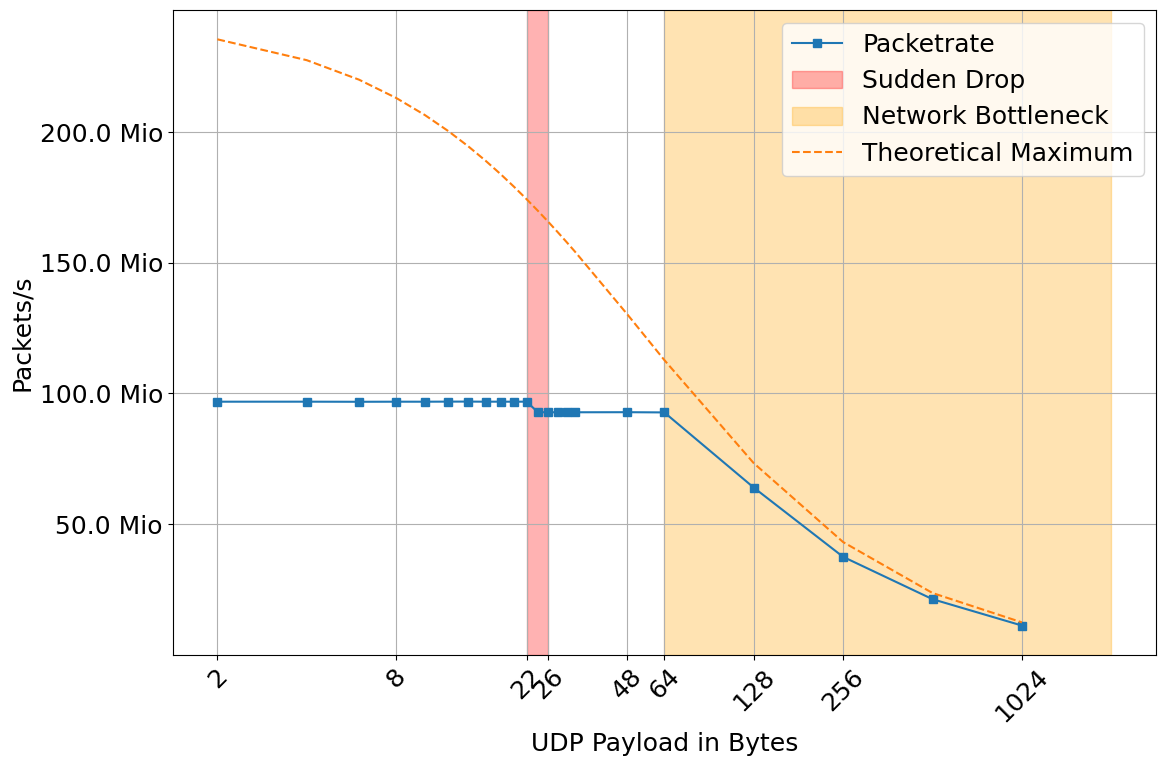

In [163]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter


ethernet_preamble = 8
ethernet_header = 6 + 6 + 2
ethernet_checksum = 4
interpacket_gap = 1
ip_header = 20
udp_header = 8
BASE_PACKET_SIZE = ethernet_preamble + ethernet_checksum + ethernet_header + interpacket_gap + ip_header + udp_header 
BASE_PACKET_SIZE_W = ethernet_checksum + ethernet_header + ip_header + udp_header 
print(BASE_PACKET_SIZE)
print(BASE_PACKET_SIZE_W)

p_size = []
pps = []

def million_formatter(x, pos):
    return f'{x/1_000_000:.1f} Mio'


for m in data:
    p_size.append(m[0])
    pps.append(m[1])

theoretical = [(100*1024**3/8)/(ps+BASE_PACKET_SIZE) for ps in p_size[0:]]
print(theoretical)

plt.figure(figsize=(12, 8))
plt.tight_layout()
plt.rcParams.update({'font.size': 18})

plt.plot(p_size, pps, "-s", label="Packetrate")
#plt.title("Relationship Between Packet Size and Packet Rate")
plt.xlabel("UDP Payload in Bytes")
plt.ylabel("Packets/s")
plt.xscale('log', base=2)
tick_indecies = [0, 3, 10, 12, 16, 17, 18, 19,21]
plt.xticks([p_size[i] for i in tick_indecies], [f"{p_size[i]}" for i in tick_indecies], rotation=45)
#plt.xticks(p_size[::1], [f"{val+BASE_PACKET_SIZE_W} ({val})" for val in p_size[::1]], rotation=45)
#plt.yticks(pps, [str(val) for val in pps])
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((6, 9))
#plt.gca().yaxis.set_major_formatter(formatter)
#plt.ticklabel_format(axis='y', style='sci')

plt.gca().yaxis.set_major_formatter(FuncFormatter(million_formatter))
#plt.axvspan(22, 22, color='red', alpha=0.3, label='Sudden Drop')
plt.axvspan(22, 26, color='red', alpha=0.3, label='Sudden Drop')
plt.axvspan(64, 2048, color='orange', alpha=0.3, label='Network Bottleneck')
#plt.autoscale(False)
plt.plot(p_size[0:], theoretical, "--", label="Theoretical Maximum")

plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.savefig("pps_pps.pdf")
plt.show()

[12500000000.0, 12500000000.0, 12500000000.0, 12500000000.0, 12500000000.0, 12500000000.0, 12500000000.0, 12500000000.0, 12500000000.0, 12500000000.0, 12500000000.0, 12500000000.0, 12500000000.0, 12500000000.0, 12500000000.0, 12500000000.0, 12500000000.0, 12500000000.0, 12500000000.0, 12500000000.0, 12500000000.0, 12500000000.0]


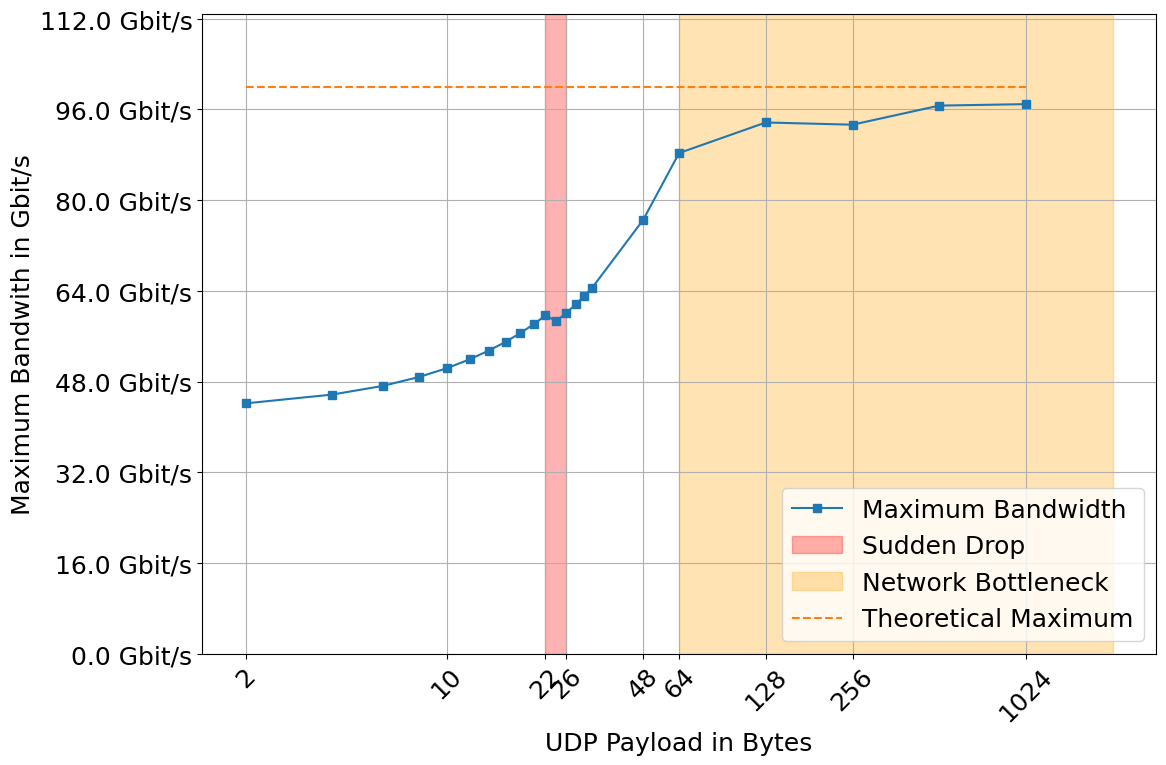

In [164]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter

p_size = []
pps = []

def million_formatter(x, pos):
    return f'{x*8/1_000_000_000:.1f} Gbit/s'


for m in data:
    p_size.append(m[0])
    pps.append(int(m[1])*int(m[0]+BASE_PACKET_SIZE))

theoretical = [(100*1000**3/8) for ps in p_size[0:]]
print(theoretical)
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(12, 8))
plt.plot(p_size, pps, "-s", label="Maximum Bandwidth")
#plt.title("Relationship Between Packet Size and Bandwidth")
plt.xlabel("UDP Payload in Bytes")
plt.ylabel("Maximum Bandwith in Gbit/s")
plt.xscale('log', base=2)
tick_indecies = [0, 4, 10, 12, 16, 17, 18, 19, 21]
plt.xticks([p_size[i] for i in tick_indecies], [f"{p_size[i]}" for i in tick_indecies], rotation=45)
#plt.xticks(p_size[::1], [f"{val+42} ({val})" for val in p_size[::1]], rotation=45)
plt.ylim(0, 105*1024**3/8)
#plt.xticks([p_size[]])
#plt.xticks(p_size, [f"{str(val+42)} ({str(val)})" for val in p_size], rotation=90)
#plt.yticks(pps, [str(val) for val in pps])
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((6, 9))
#plt.gca().yaxis.set_major_formatter(formatter)
#plt.ticklabel_format(axis='y', style='sci')

plt.gca().yaxis.set_major_formatter(FuncFormatter(million_formatter))
plt.axvspan(22, 26, color='red', alpha=0.3, label='Sudden Drop')
plt.axvspan(64, 2048, color='orange', alpha=0.3, label='Network Bottleneck')

#plt.autoscale(False)
plt.plot(p_size[0:], theoretical, "--", label="Theoretical Maximum")

plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.savefig("pps_bandwidth.pdf")
plt.show()


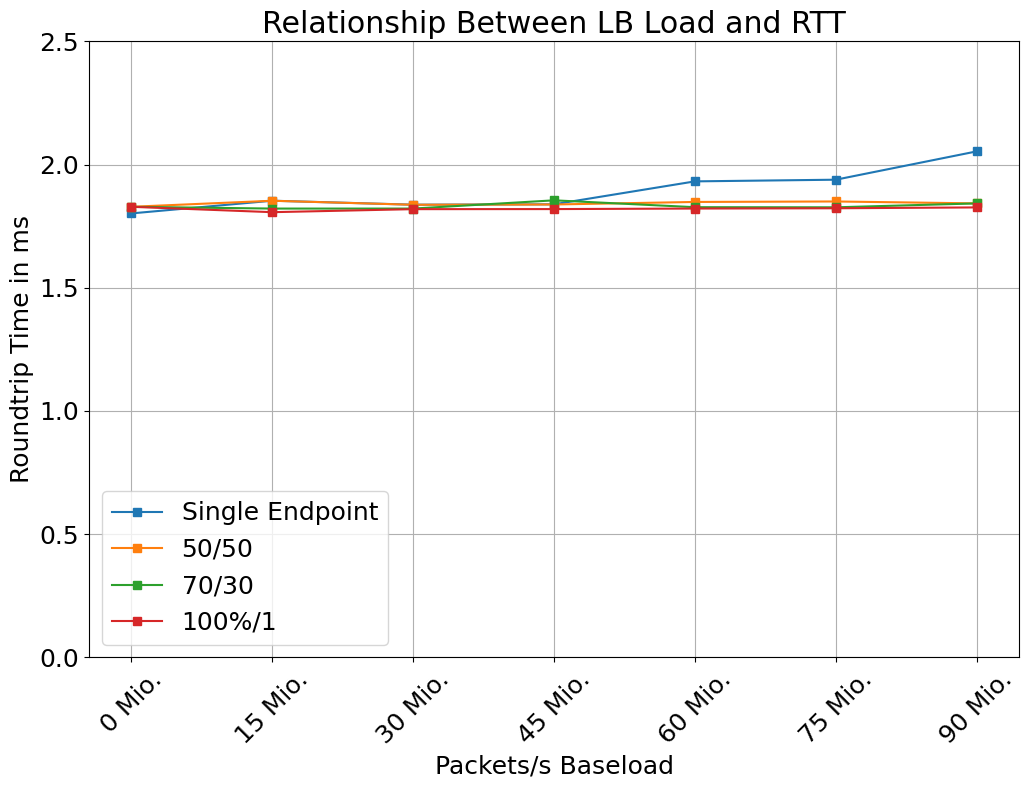

In [165]:
def delta(data):
    return [(i[0] - i[1])/1000 for i in data]

def get_average(data):
    mean = 0
    for i in data:
        mean += i
    return mean/len(data)

x = [0, 15000000, 30000000, 45000000, 60000000, 75000000, 90000000]
y = [1.801528, 1.853107, 1.836979, 1.838533, 1.931609, 1.938372, 2.053371]
y1 = [1.828419, 1.852950, 1.836671, 1.837798, 1.848069, 1.850008, 1.842234]
y2 = [1.828419, 1.821199, 1.821199, 1.854637, 1.826800, 1.826341, 1.842189]
y3 = [1.828419, 1.806570, 1.818861, 1.819119, 1.821324, 1.822464, 1.825892]
plt.figure(figsize=(12, 8))
plt.grid(True)
plt.ylim(0, 2.5)

plt.plot(x, y, "-s", label="Single Endpoint")
plt.plot(x, y1, "-s", label="50/50")
plt.plot(x, y2, "-s", label="70/30")
plt.plot(x, y3, "-s", label="100%/1")
plt.title("Relationship Between LB Load and RTT")
plt.xlabel("Packets/s Baseload")
plt.xticks(x, [str(int(val/1_000_000)) + " Mio." for val in x], rotation=45)
plt.ylabel("Roundtrip Time in ms")
plt.legend()
plt.savefig("worst.png")
plt.show()

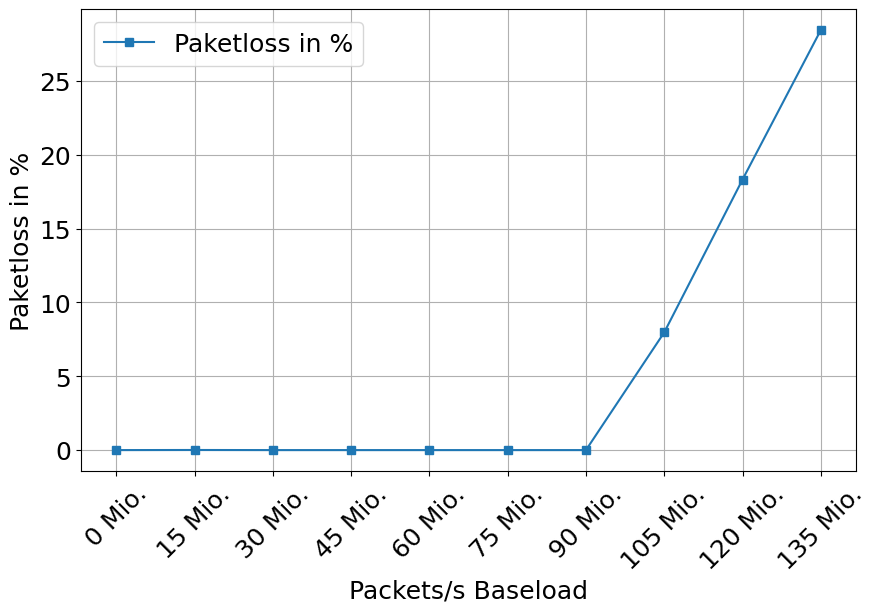

In [166]:
import matplotlib.pyplot as plt

x = [0, 15_000_000, 30_000_000, 45_000_000, 60_000_000, 75_000_000, 90_000_000, 105_000_000, 120_000_000, 135_000_000]
y = [0, 0.006944444444444444, 0, 0, 0, 0, 0, 7.972222222222222, 18.319444444444443, 28.444444444444443]
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.plot(x, y, "-s", label="Paketloss in %")
#plt.title("Relationship Between LB Load and Paketloss")
plt.xlabel("Packets/s Baseload")
plt.xticks(x, [str(int(val/1_000_000)) + " Mio." for val in x], rotation=45)
plt.ylabel("Paketloss in %")
plt.legend()
plt.show()

[(15074875, 0.0), (30152323, 0.0), (45229374, 0.0), (60307326, 0.0), (75384399, 0.0), (90465807, 0.0), (91471770, 0.0), (92477930, 0.0), (93481860, 0.0), (94485335, 0.0), (95492131, 0.0), (96495199, 0.0006064026223031963), (97506948, 0.007691202078740966), (98506425, 0.016979226060741093), (99515528, 0.026859835483874012), (100518663, 0.036329553164064644), (105541345, 0.08227386007546249), (120449511, 0.19719289638358384), (134508813, 0.2798033426686574)]


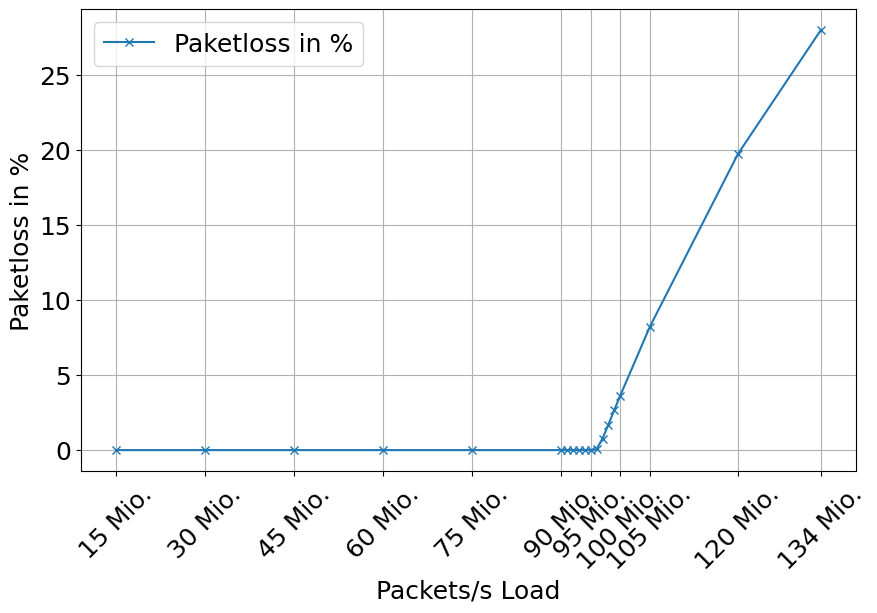

In [ ]:
def calc_paketloss(nr):
    out = []
    loads = [15, 30, 45, 60, 75, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 105, 120, 135]

    for load in loads:
        with open(f"../measurements/paper/paketloss/tx_{load}m_{nr}.txt") as tx:
            with open(f"../measurements/paper/paketloss/rx_{load}m_{nr}.txt") as rx:
                tx_average = 0
                tx_counter = 0

                tx_lines = tx.readlines()

                for i in range(0, len(tx_lines)):
                    tx_average += int(tx_lines[i])
                    tx_counter += 1
                tx_average = int(tx_average/tx_counter)

                rx_average = 0
                rx_counter = 0

                rx_lines = rx.readlines()

                for i in range(0, len(rx_lines)):
                    rx_average += int(rx_lines[i])
                    rx_counter += 1
                rx_average = int(rx_average/rx_counter)
                
                paketloss = 1-(rx_average/tx_average)
                if paketloss < 0:
                    paketloss = 0
                out.append((tx_average, paketloss))
    return out

paketloss1 = calc_paketloss(1)
paketloss2 = calc_paketloss(2)
paketloss3 = calc_paketloss(3)
paketloss = []

for d in range(0, len(paketloss1)):
    paketloss.append(
        (
            int((paketloss1[d][0] + paketloss2[d][0] + paketloss3[d][0])/3),
            (paketloss1[d][1] + paketloss2[d][1] + paketloss3[d][1])/3,
            )
        )
print(paketloss)

import matplotlib.pyplot as plt

x = []
y = []

for p in paketloss:
    x.append(p[0])
    y.append(p[1]*100)

plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.plot(x, y, "-x", label="Paketloss in %")
#plt.title("Relationship Between LB Load and Paketloss")
plt.xlabel("Packets/s Load")
tick_indecies = [0, 1, 2, 3, 4, 5, 10, 15, 16, 17, 18]
plt.xticks([x[i] for i in tick_indecies], [f"{str(int(x[i]/1_000_000)) + " Mio."}" for i in tick_indecies], rotation=45)
#plt.xticks(x, [str(int(val/1_000_000)) + " Mio." for val in x], rotation=45)
plt.ylabel("Paketloss in %")
plt.legend()
plt.tight_layout()
plt.savefig("pps_paketloss.pdf")
plt.show()

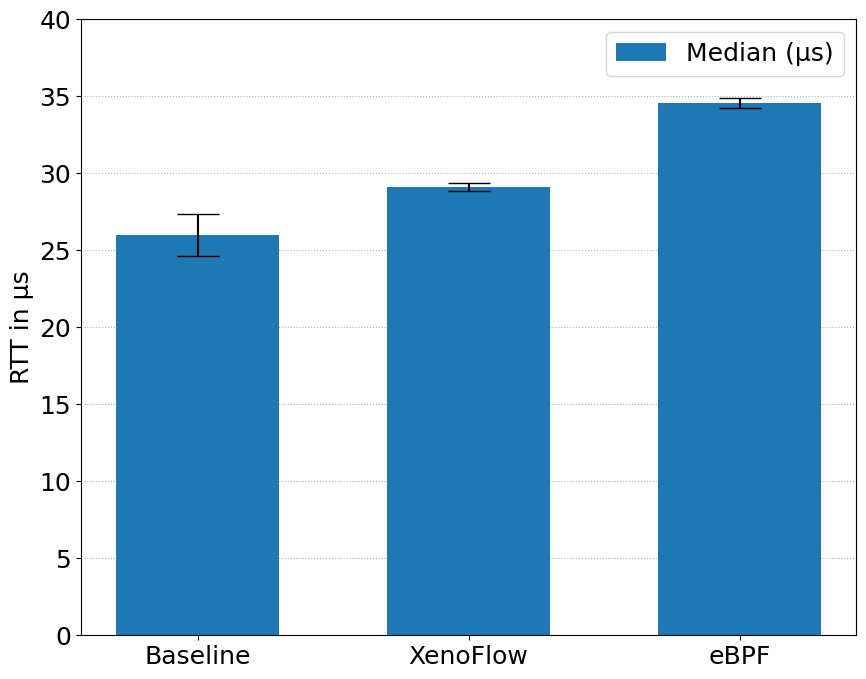

In [168]:
data = [("xenoflow_lb", 29.136870), ("ebpf_lb", 34.698115), ("bind", 111.172597), ("nginx_dns", 211.496353)]

import matplotlib.pyplot as plt
import numpy as np

labels = ["Baseline", "XenoFlow", "eBPF"]
x = np.arange(len(labels))

averages = [
    25.825736,
    np.mean([29.520194, 29.527040, 29.136870]),  # xenoflow_lb
    np.mean([34.835604, 35.025279, 34.698115]),  # ebpf_lb
#    111.172597,  # bind
#    211.496353   # nginx_dns
]

medians = [
    25.987625,
    np.mean([29.087067, 29.087067, 29.087067]),  # xenoflow_lb
    np.mean([34.093857, 34.809113, 34.809113]),  # ebpf_lb
#    102.519989,  # bind
#    136.971474   # nginx_dns
]

stddevs = [
    1.354865,
    np.std([1.296268, 1.733186, 1.243285], ddof=1),  # xenoflow_lb
    np.std([1.273546, 1.807213, 1.276924], ddof=1),  # ebpf_lb
#    35.756321,
#    119.529759
]

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_axisbelow(True)
ax.grid(True, axis='y', linestyle=':')

ax.bar(x, medians, width=0.6, yerr=stddevs, capsize=15, label='Median (µs)')
ax.set_xticks(x, labels)
ax.set_ylim(0, 40)
ax.set_ylabel('RTT in µs')
#plt.title('Baseline Latency - XenoFlow vs EBPF')
ax.legend()
plt.savefig("rtt.pdf")
plt.show()